In [1]:
%load_ext autoreload
%autoreload 2

# 9.53 Pset 1
Kevin Meng

*Collaborators: Jagdeep Bhatia, Neil Deshmukh*

In [2]:
import json
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

from perceptron import Perceptron

## Helper Functions

In [3]:
def plot_2d(cur_x, cur_y, title):
    """
    Scatter plots cur_x on a 2D grid, with colors based on cur_y.
    The inputs are assumed to be PCA-ed (for axis labelling).
    """
    
    plt.scatter(cur_x[:, 0], cur_x[:, 1], c=cur_y)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(title)
    plt.show()

## Problem 1

### 1.1

In [4]:
iris = pd.read_csv("Iris.txt", header=None)
IRIS_CLASSES = ["Iris-setosa", "Iris-virginica", "Iris-versicolor"]
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris["label"] = iris.apply(lambda x: IRIS_CLASSES.index(x[4]), axis=1)
x = iris[[0, 1, 2, 3]].to_numpy()
x = (x - x.mean(axis=0)).T
y = np.expand_dims(iris["label"].to_numpy(), 0)

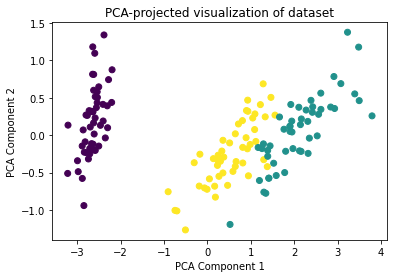

In [6]:
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x.T)
plot_2d(x_reduced, y, "PCA-projected visualization of dataset")

### 1.2.1

Let's combine virginica and versicolor into class `-1`, and use setosa as class `1`.

In [7]:
iris_p1 = iris.copy()
iris_p1["label"] = iris_p1.apply(lambda x: 1 if x[4] == "Iris-setosa" else -1, axis=1)

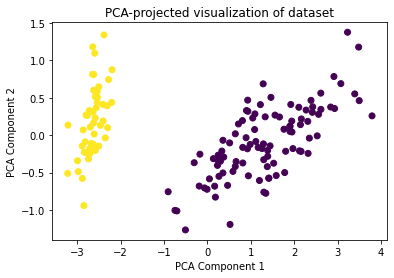

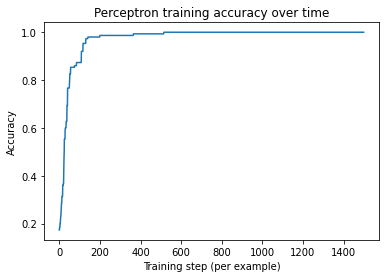

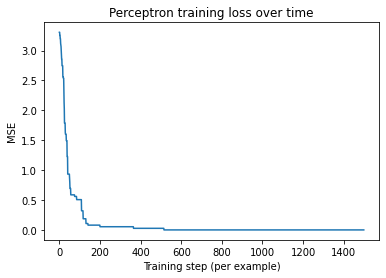

3

In [8]:
# Create x and y data
x = iris_p1[[0, 1, 2, 3]].to_numpy()
x = (x - x.mean(axis=0)).T
y = np.expand_dims(iris_p1["label"].to_numpy(), 0)

# Compute PCA transformation (for visualization only)
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x.T)
plot_2d(x_reduced, y, "PCA-projected visualization of dataset")

# Train perceptron
p = Perceptron(x.shape[0], is_adaline=False)
p.train(x, y, pca, epochs=10, lr=1e-2)

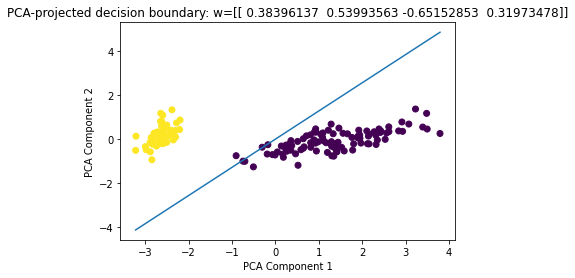

In [9]:
# Plot decision boundary translated into 2D space
weight_parallel = p.get_parallel_w(pca)

x_reduced = pca.transform(x.T)
line_x = np.linspace(np.min(x_reduced), np.max(x_reduced))
line_y = line_x * weight_parallel[1] / weight_parallel[0]
plt.plot(line_x, line_y)
plot_2d(x_reduced, y, f"PCA-projected decision boundary: w={p.w}")

Note that the decision boundary, when projected from 4D -> 2D using PCA, may not separate the point clouds exactly. We _could_ first PCA then find a 2D hyperplane to have perfect two-dimensional separability, but that isn't the point of this problem. The plot above is just for rough visualization.

### 1.3

Text(0.5, 1.0, 'Effect of LR on convergence speed')

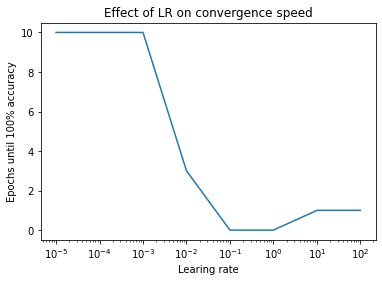

In [10]:
# Graph effect of learning rate on convergence speed
lrs = [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
epochs = [p.train(x, y, pca, epochs=10, lr=lr, plot_progress=False, acc_lim=1) for lr in lrs]
plt.plot(lrs, epochs)
plt.xscale("log")
plt.xlabel("Learing rate")
plt.ylabel("Epochs until 100% accuracy")
plt.title("Effect of LR on convergence speed")

$10^{-1}$ and $1$ seem to be good selections for LR.

### 1.4

The learning rate should be $\lambda = \left\lvert \frac{w^Tx}{x^Tx} \right\rvert$.

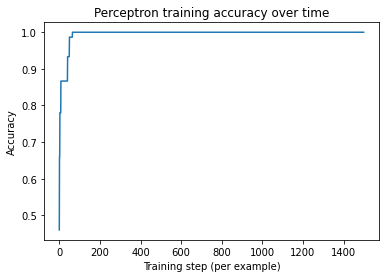

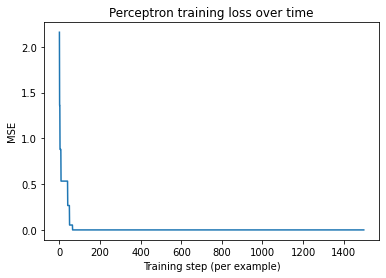

0

In [11]:
# Train perceptron
p = Perceptron(x.shape[0], is_adaline=False)
p.train(x, y, pca, epochs=10, lr=1e-5, min_correct=True)

It converges within the first epoch - very fast.

### 1.5

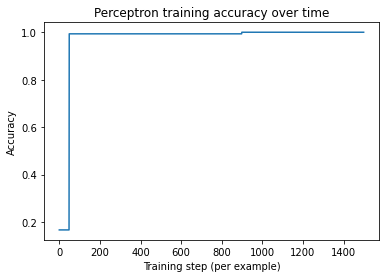

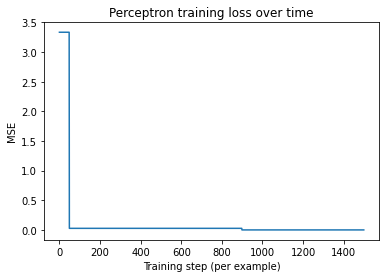

5

In [12]:
# Train perceptron
p = Perceptron(x.shape[0], is_adaline=False)
p.train(x, y, pca, epochs=10, lr=1e-2, batch_size=50)

## Problem 2

![sol.png](sol.png)

## Problem 3

### 3.1, 3.2, 3.4

In [13]:
iris_p3 = iris.copy()
iris_p3 = iris_p3[iris_p3[4] != "Iris-setosa"]
iris_p3["label"] = iris_p3.apply(lambda x: 1 if x[4] == "Iris-versicolor" else -1, axis=1)

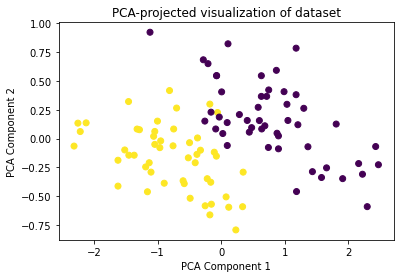

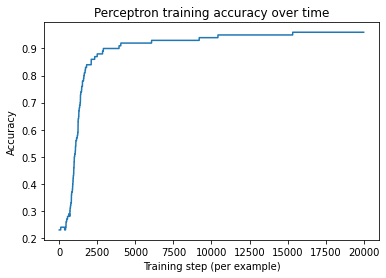

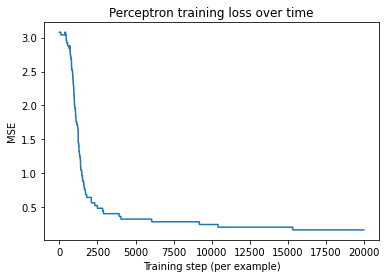

200

In [14]:
# Create x and y data
x = iris_p3[[0, 1, 2, 3]].to_numpy()
x = (x - x.mean(axis=0)).T
y = np.expand_dims(iris_p3["label"].to_numpy(), 0)

# Compute PCA transformation (for visualization only)
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x.T)
plot_2d(x_reduced, y, "PCA-projected visualization of dataset")

# Train perceptron
p = Perceptron(x.shape[0], is_adaline=False)
p.train(x, y, pca, epochs=200, lr=1e-3)

### 3.3

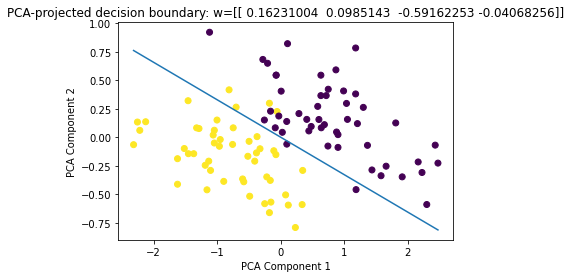

In [15]:
# Plot decision boundary translated into 2D space
weight_parallel = p.get_parallel_w(pca)

x_reduced = pca.transform(x.T)
line_x = np.linspace(np.min(x_reduced), np.max(x_reduced))
line_y = line_x * weight_parallel[1] / weight_parallel[0]
plt.plot(line_x, line_y)
plot_2d(x_reduced, y, f"PCA-projected decision boundary: w={p.w}")

Again, note that the decision boundary, when projected from 4D -> 2D using PCA, may not exactly represent the original boundary. We _could_ first PCA then find a 2D hyperplane, but that isn't the point of this problem. The plot above is just for rough visualization.

### 3.5

Text(0.5, 1.0, 'Effect of LR on convergence speed')

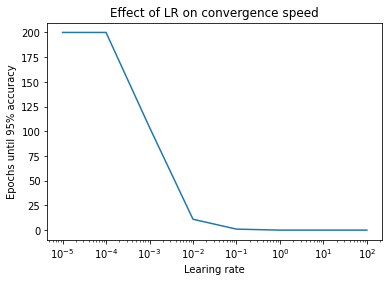

In [16]:
# Graph effect of learning rate on convergence speed
lrs = [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
epochs = [p.train(x, y, pca, epochs=200, lr=lr, plot_progress=False, acc_lim=0.95) for lr in lrs]
plt.plot(lrs, epochs)
plt.xscale("log")
plt.xlabel("Learing rate")
plt.ylabel("Epochs until 95% accuracy")
plt.title("Effect of LR on convergence speed")

Large learning rates (e.g. $\geq 1$) seem to be good. This contrasts the perceptron algorithm, which appears to be less consistent at larger learning rates.